
# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:

#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:

# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#data types and number of entries in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#Number of duplicates
df.duplicated().sum()

1

In [5]:
#Shape of dataframe
df.shape

(10866, 21)

In [6]:
#Number of unique values
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
#descriptive statistics for each column
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Observation:
     1.currency isn't mentioned in the dataset, we will consider it to be US dollar in all columns.
     2. vote_count is different for all the movies, therefore we directly make conclusions on the popularity of movies based on the average vote count


### Data Cleaning (Remove unused data from dataset)

#### After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section.

##### Steps:
    1- remove duplicates
    2- remove NAN values
    3- remove columns that aren't gonna be used
    4- Change release dates into date format
    5- Change float values to integers
    6- Calculate the profit of each movie and insert it in a new column


> **1- Removing duplicates and rows of missing values**

In [8]:
#First remove duplicates
df.drop_duplicates(keep='first', inplace= True)

In [9]:
#Make sure they were dropped
df.duplicated().sum()

0

In [10]:
#Then remove all values of 0 and make them 'NAN' in both columns 'budget' and 'revenue'
#create a list with both columns
na_list =['budget', 'revenue']

#Turn zeros into NANs
df[na_list] = df[na_list].replace(0, np.NAN)

#Drop NANs
df.dropna(subset = na_list, inplace=True)

#final no. of movies stated
rows, col = df.shape
print('we have {} movies'.format(rows-1))

we have 3853 movies


In [11]:
#Drop NAN values in runtime also
df['runtime'].replace(0, np.NAN)

df['runtime'].dropna(inplace= True)

#Testing
df.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       4
homepage                2428
director                   1
tagline                  280
keywords                 138
overview                   0
runtime                    0
genres                     0
production_companies      46
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> **2- Fixing date and time and removing unused data**

In [12]:
#Fix date using pandas datetime
df.release_date = pd.to_datetime(df['release_date'])

In [13]:
#making sure date is fixed
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [14]:
#deleting the columns that we will not use
df = df.drop(columns=['id', 'imdb_id',  'budget_adj', 'revenue_adj', 'homepage', 'overview', 'production_companies', 'vote_count', 'vote_average'])

In [15]:
#new shape of dataframe
df.head()

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,release_date,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,2015-04-01,2015


> **3- Changing data types of selected columns**

In [16]:
#Checking data types that need to be changed
df.dtypes

popularity               float64
budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
keywords                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [19]:
#Changing float data types in 'popularity', 'budget', 'revenue' and 'vote_average' into integers
fl_cols = ['popularity', 'budget', 'revenue']

df[fl_cols] = df[fl_cols].applymap(np.int64)


In [20]:
#Making sure all float values are turned into integers.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 12 columns):
popularity        3854 non-null int64
budget            3854 non-null int64
revenue           3854 non-null int64
original_title    3854 non-null object
cast              3850 non-null object
director          3853 non-null object
tagline           3574 non-null object
keywords          3716 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_date      3854 non-null datetime64[ns]
release_year      3854 non-null int64
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 301.1+ KB


> **4- Insert new column that has calculated profit**

In [21]:

#Calculate the pofit of each movie in a new column named profit_earned
df.insert(3, 'profit_earned', df['revenue']-df['budget'])

df.head()

,popularity,budget,revenue,profit_earned,original_title,cast,director,tagline,keywords,runtime,genres,release_date,release_year
0,32,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,28,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,13,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,11,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,9,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,2015-04-01,2015


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Which movies have the highest and lowest budget?)

In [22]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#first we define a 'calculate' function used to calculate highest and lowest values in different columns

def calculate(column):
    #for highest earned profit
    high= df[column].idxmax()
    high_det=pd.DataFrame(df.loc[high])
    
    #for lowest earned profit
    low= df[column].idxmin()
    low_det=pd.DataFrame(df.loc[low])
    
    #collectin data in one place
    schedule=pd.concat([high_det, low_det], axis=1)
    
    return schedule

calculate('budget')

,2244,2618
popularity,0,0
budget,425000000,1
revenue,11087569,100
profit_earned,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
keywords,assassin|small town|revenge|deception|super speed,restaurant|neighbor|dog|ring
runtime,100,95


> As seen film of index 2244 had the greatest budget
  and that of index 2618 had the lowest budget

### Research Question 2  (Which movies have the highest and lowest profit earned?)

In [23]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

calculate('profit_earned')

,1386,2244
popularity,9,0
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100


> Movie with index 1386 had the highest profit earned and movie with index 2244 had the lowest profit earned

### Research Question 3 (Which movies have the highest and lowest revenue?)

In [24]:
#Use the same calclate function to calculate revenue
calculate('revenue')

,1386,5067
popularity,9,0
budget,237000000,6000000
revenue,2781505847,2
profit_earned,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
keywords,culture clash|future|space war|space colony|so...,NaN
runtime,162,94


> Movie with index 1386 had the highest reveue while this with 5067 had the lowest revenue


### Question 4 (relation between prfitability and year of release)


In [25]:
#We need to know the profits of movies for every year and this means summing up all movies of each year.

yearly_profit = df.groupby('release_year')['profit_earned'].sum()
yearly_profit

release_year
1960      108198052
1961      299083188
1962      166879846
1963      115411882
1964      294678387
1965      399281854
1966       52468689
1967      636334637
1968      168271762
1969      206862989
1970      454070023
1971      336284710
1972      457235917
1973     1057686099
1974      650582027
1975      808207270
1976      629426536
1977     1743308485
1978     1005100089
1979      950330150
1980     1002065664
1981     1320251458
1982     1811756359
1983     1505073842
1984     1833438131
1985     1666899046
1986     1665354869
1987     2148546726
1988     2313076703
1989     3603940908
1990     3454904971
1991     3048121485
1992     3873046070
1993     4575828325
1994     4704384415
1995     5608098320
1996     4736626727
1997     6380241248
1998     5274145395
1999     6433209130
2000     6110774823
2001     8022044875
2002     9004589344
2003     9202155213
2004     9822506642
2005     9259452998
2006     8726299999
2007    11686103667
2008    11843373159
2009   

Text(0.5, 1.0, 'Profits earned vs. year of release of all movies')

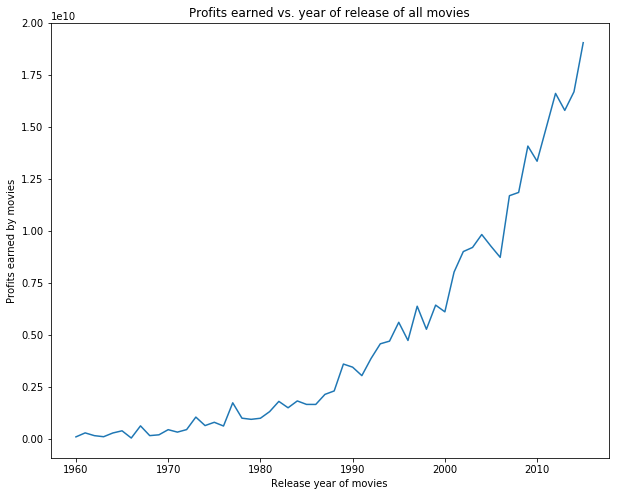

In [26]:
#now we can plot these results to see how they look like
plt.figure(figsize= (10, 8))
plt.plot(yearly_profit)
plt.xlabel('Release year of movies')
plt.ylabel('Profits earned by movies')
plt.title('Profits earned vs. year of release of all movies')

> As seen, year 2015 was the year with highest profits earned along the data frame.

#### We leave profitability and money issues now but we will get back to them later on.

### Question 5 (Longest and shortest movies)

In [27]:
#Use calculate function to calculate highest and lowest runtime
calculate('runtime')

,2107,5162
popularity,0,0
budget,18000000,10
revenue,871279,5
profit_earned,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
keywords,gun|car bomb|tv mini-series|terrorism|opec,NaN
runtime,338,15


> Movie with index number 2107 has the longest runtime while this  with index 5162 has the shortest

### Question 6: What is the average runtime of movies?

In [28]:
#Find out statistics of dataframe
df.describe()

,popularity,budget,revenue,profit_earned,runtime,release_year
count,3854.000000,3.854000e+03,3.854000e+03,3.854000e+03,3854.000000,3854.000000
mean,0.709912,3.720370e+07,1.076866e+08,7.048292e+07,109.220291,2001.261028
std,1.472446,4.220822e+07,1.765393e+08,1.506195e+08,19.922820,11.282575
min,0.000000,1.000000e+00,2.000000e+00,-4.139124e+08,15.000000,1960.000000
25%,0.000000,1.000000e+07,1.360003e+07,-1.321535e+06,95.000000,1995.000000
50%,0.000000,2.400000e+07,4.480000e+07,2.002019e+07,106.000000,2004.000000
75%,1.000000,5.000000e+07,1.242125e+08,8.170331e+07,119.000000,2010.000000
max,32.000000,4.250000e+08,2.781506e+09,2.544506e+09,338.000000,2015.000000


> The average runtime is 109.220291

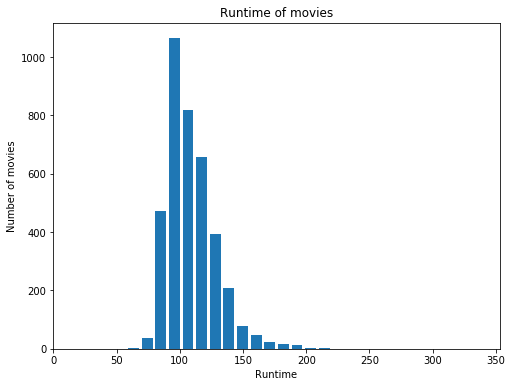

In [29]:
#plotting histogram of movies runtime
plt.figure(figsize= (8, 6))
#Name of x axis
plt.xlabel('Runtime')
#Name of y axis
plt.ylabel('Number of movies')
#Name of graogh
plt.title('Runtime of movies')
#giving plot
plt.hist(df['runtime'], rwidth= 0.8, bins=30);

>As seen this distribution is right skewed. Most movies are between 80 and 150 minutes long (almost more than 1000 movies fall in this criteria).

Text(0, 0.5, 'Number of movies')

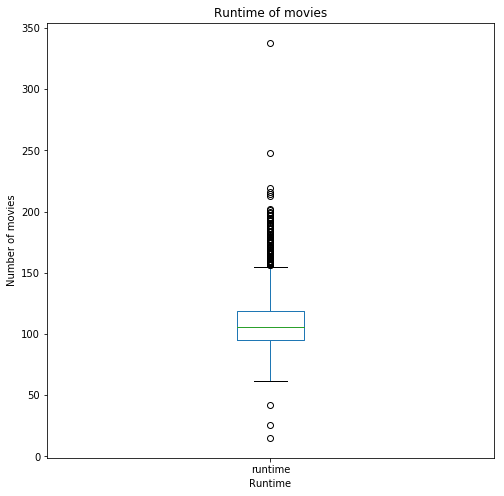

In [30]:
#see more visuals to get more findings
# A box plot of runtime of movies
df['runtime'].plot(figsize= (8,8), kind='box');
plt.title('Runtime of movies')
plt.xlabel('Runtime')
plt.ylabel('Number of movies')

> So, as we can see, there are outliers in this dataframe, looking at both calculations and plots above we get to know that:
    1. 25% of movies are less than 95 minutes long
    2. 50% of movies are less than 109 minutes long
    3. 75% of movies are less than 119 minutes long

###### Now we see successful movies based on profit earned... We will choose films with profit more than 50 million dollar.

### Question 7 (What are movies with profit more than 50 million dollar?)

In [31]:
#Clean data to only keep movies with profit higher than 50 million dollars.
high_profit = df[df['profit_earned'] >= 50000000]


high_profit.head()

,popularity,budget,revenue,profit_earned,original_title,cast,director,tagline,keywords,runtime,genres,release_date,release_year
0,32,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,28,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,13,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,11,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,9,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,2015-04-01,2015


In [32]:
#Seeing the new shape of dataframe
high_profit.shape

(1338, 13)

### Question8 (What are the most used genres?)

In [33]:
#Now we define an argument to split strings that has '|' and use it later on
def data(column):
    data = high_profit[column].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending= False)
    return count

In [34]:
#This will count movies of each genre
count = data('genres')
print(count)

Comedy             492
Drama              481
Action             464
Thriller           405
Adventure          379
Family             229
Romance            215
Science Fiction    206
Fantasy            201
Crime              193
Horror             123
Animation          122
Mystery            113
Music               47
War                 46
History             39
Western             14
Documentary          4
Foreign              1
dtype: int64


> As we can see, the five first genres are Comedy, Drama, Action, Thriller and Adventure. Let's see that visualised.


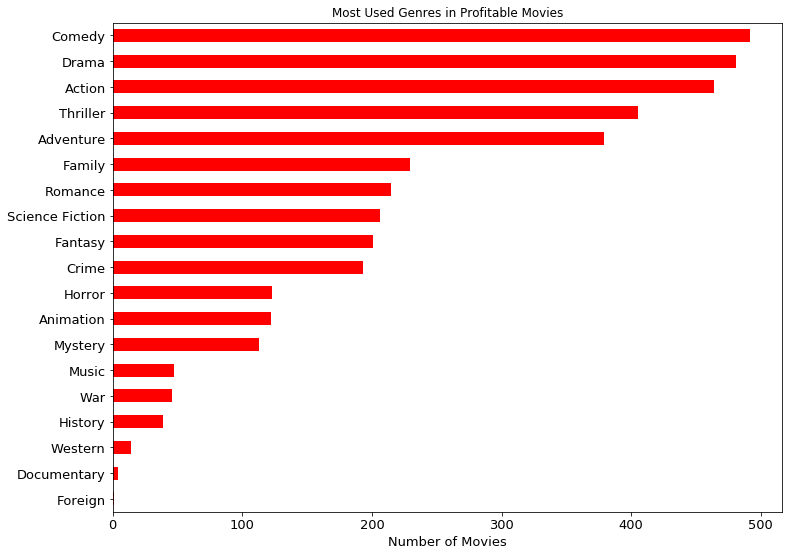

In [35]:
#We will plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)
Gen = count.plot.barh(color = 'RED', fontsize = 13)
Gen.set(title = 'Most Used Genres in Profitable Movies')
Gen.set_xlabel('Number of Movies', color = 'black', fontsize = '13')
Gen.figure.set_size_inches(12, 9)
plt.show()

### Question 9 (Who are the most frequent actors in high profit movies?)

In [36]:
#use count function again to see frequent cast
count = data('cast')
print(count)

Tom Cruise               27
Brad Pitt                25
Tom Hanks                22
Sylvester Stallone       21
Cameron Diaz             20
Adam Sandler             19
Jim Carrey               19
Harrison Ford            19
Denzel Washington        19
Robert De Niro           19
Bruce Willis             19
Ben Stiller              18
Eddie Murphy             18
Matt Damon               18
Will Smith               17
Johnny Depp              17
Arnold Schwarzenegger    17
Samuel L. Jackson        17
Ralph Fiennes            16
Nicolas Cage             16
Robin Williams           16
Liam Neeson              15
Julia Roberts            15
Sandra Bullock           15
Mel Gibson               15
Gary Oldman              15
Anne Hathaway            14
Dwayne Johnson           14
Mark Wahlberg            14
Owen Wilson              14
                         ..
Mie Hama                  1
Ellen Pompeo              1
James Tolkan              1
June Foray                1
Connor Corum        

> The most 3 popular actors in the high profit movies are Tom cruise(27 movies), Brad Pitt(25 movies) and Tom Hanks(22 movies)

### Question 10 (The most frequent director)

In [37]:
#Use the count function again to calculate the most frequent directors.
count = data('director')
count.head()

Steven Spielberg    23
Robert Zemeckis     13
Clint Eastwood      12
Tim Burton          11
Ron Howard          10
dtype: int64

> The most frequent directors are Steven Spielberg(23 movies), Robert Zemeckis(13 movies) and Clint Eastwood(12 movies)

### Question 11 (What is the average budget of high profit movies?)

In [38]:
#Calculate mean of budget in high profit movies
high_profit['budget'].mean()

60444957.76083707

> The average budget is (60444957.76)

### Question 12 (What is the average runtime of high profit movies?)

In [39]:
#Calculate mean of runtime in high profit movies
high_profit['runtime'].mean()

113.66741405082212

> The average runtime is (113.667)

### Question 13 (What is the average revenue of high profit movies?)

In [40]:
#Calculate mean of revenue in high profit movies
high_profit['revenue'].mean()

254957662.59491777

<a id='conclusions'></a>
## Conclusions

> This study shows interesting information about movies.
> At the beginning we explored the whole data and then we chose the high profit movies which make profit higher than 50 million dollar.
> Movies that are high in profit are:
    1. Average budget is around 60 million dollar.
    2. Average runtime is about 113 minutes.
    3. Actors hired the most in high profit movies are: Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone & Cameron Diaz.
    4. Directors hired the most are: Steven Spielberg, Robert Zemeckis, Clint Eastwood, Tim Burton, Tony Scott.
    5. Most popular genres are: comedy, drama, action, thriller and adventure.
    
> Making high profit movies will enable us to make average revenue of more than 255 million dollars.
>
>
> This study was made with a limitation by choosing movies that make a profit that is around 50 million dollars. This aims to make profitable movies and to know their characteristics, though it may still have some errors.
> Since currency isn't specified, if the currency used in revenue and budget isn't (US dollar) in all columns, this would mean the analysis isn't correct.
> We also dropped rows that have missing values and duplicated rows.
>
>
